EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

Name: Saumyajith S.A.D.P.        

Index: 210580M

GitHub repo: https://github.com/Spramidu/EN3160_A01



Task 1

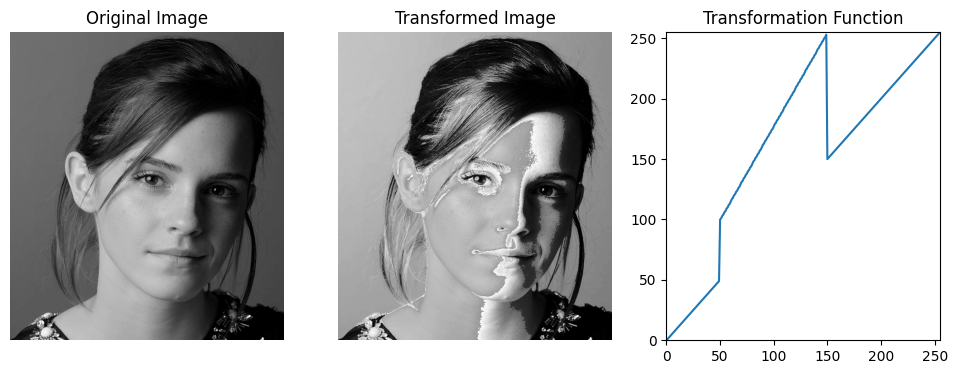

In [2]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
f = cv.imread('C:/Users/spram/Documents/IPNMV/images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Define the key points from the intensity transformation in the graph 
input_values = np.array([0, 50, 50, 150, 150, 255])
output_values = np.array([0, 50, 100, 255, 150, 255])

# Create a lookup table using linear interpolation
t = np.interp(np.arange(256), input_values, output_values).astype(np.uint8)

# Apply the transformation to the image
g = t[f]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Original image
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')

# Transformed image
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')

# Transformation function plot
ax[2].plot(np.arange(256), t)
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_title('Transformation Function')

# Turn off axis for images
for a in ax[0:2]:
    a.axis('off')

plt.show()



Task 2

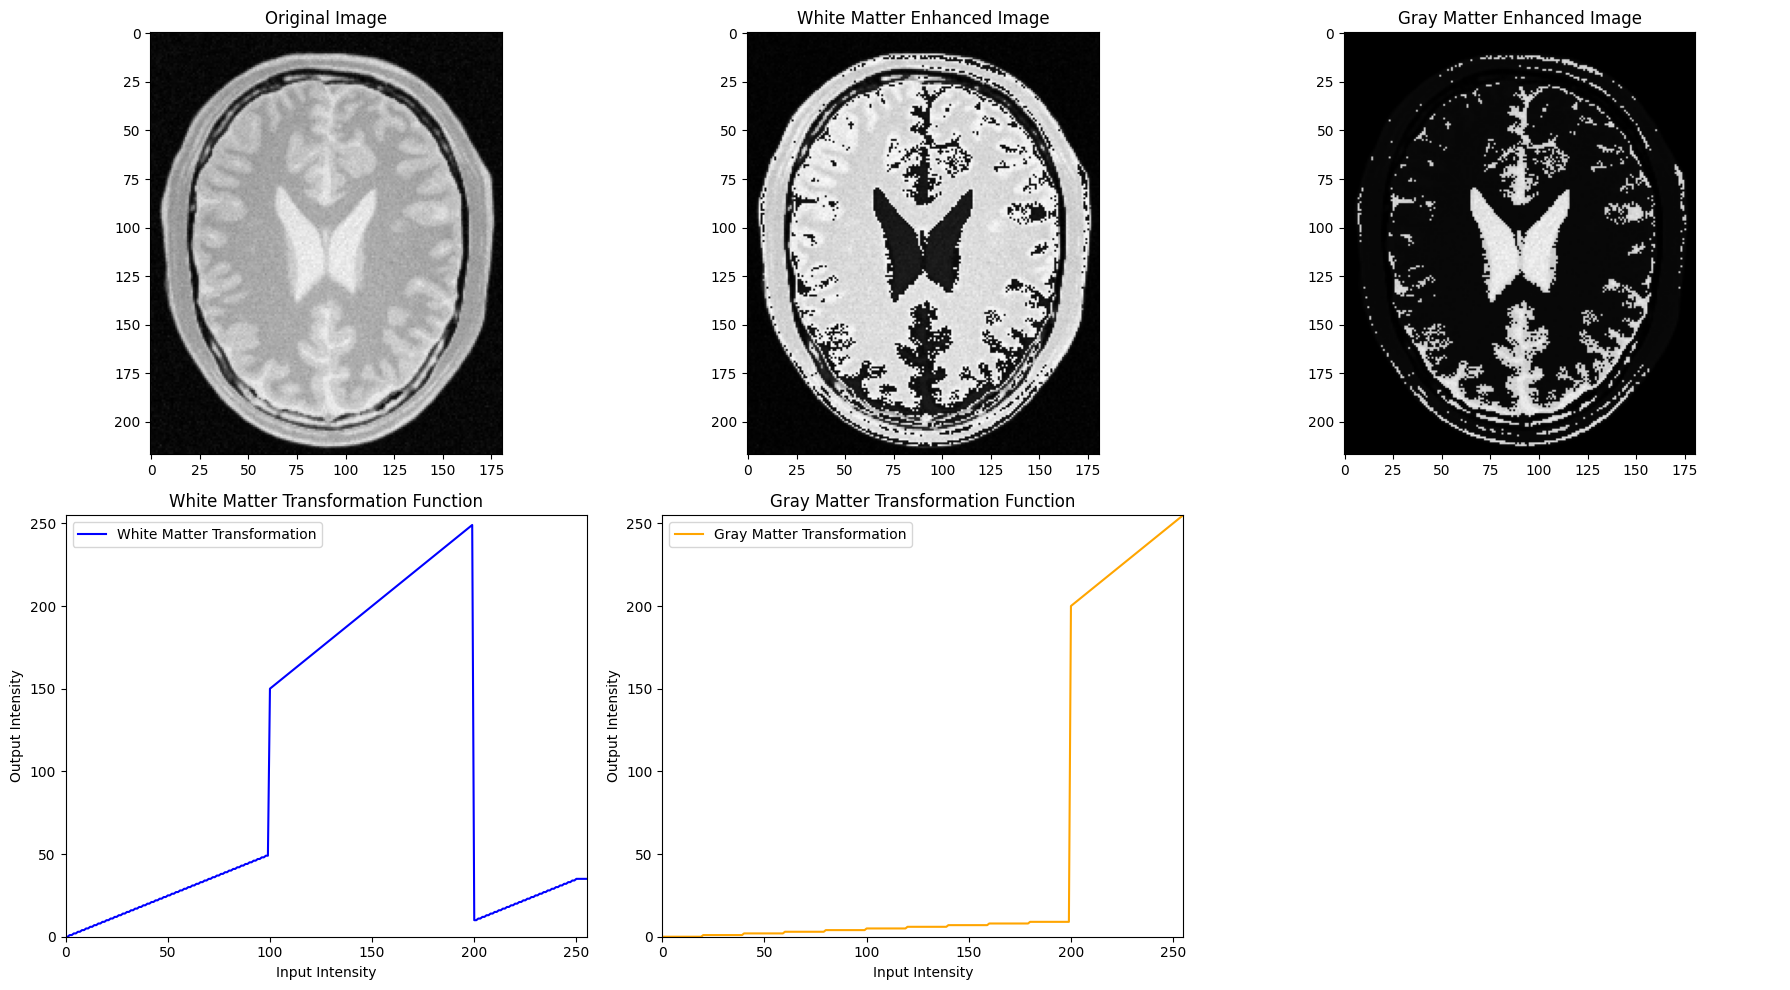

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
image_path = 'C:\\Users\\spram\\Documents\\IPNMV\\images\\brain_proton_density_slice.png'  
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Define key points for the transformations
# White Matter Transformation
input_values_white = np.array([0, 100, 100, 200, 200,250])
output_values_white = np.array([0, 50, 150, 250, 10,35])

# Gray Matter Transformation
input_values_gray = np.array([0, 200, 200,255])
output_values_gray = np.array([0,10, 200, 255])

# Create lookup tables using linear interpolation for non-linear transformations
t_white = np.interp(np.arange(256), input_values_white, output_values_white).astype(np.uint8)
t_gray = np.interp(np.arange(256), input_values_gray, output_values_gray).astype(np.uint8)

# Apply transformations to the image
g_white_matter = t_white[f]
g_gray_matter = t_gray[f]

# Plot the results
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Original image
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')

# Transformed images
ax[0, 1].imshow(g_white_matter, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('White Matter Enhanced Image')

ax[0, 2].imshow(g_gray_matter, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title('Gray Matter Enhanced Image')

# Transformation function plots for white matter
ax[1, 0].plot(np.arange(256), t_white, label='White Matter Transformation', color='blue')
ax[1, 0].set_title('White Matter Transformation Function')
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')
ax[1, 0].set_ylim([0, 255])
ax[1, 0].set_xlim([0, 255])
ax[1, 0].legend()

# Transformation function plots for gray matter
ax[1, 1].plot(np.arange(256), t_gray, label='Gray Matter Transformation', color='orange')
ax[1, 1].set_title('Gray Matter Transformation Function')
ax[1, 1].set_xlabel('Input Intensity')
ax[1, 1].set_ylabel('Output Intensity')
ax[1, 1].set_ylim([0, 255])
ax[1, 1].set_xlim([0, 255])
ax[1, 1].legend()

# Hide the axes for the last plot
ax[1, 2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()




Task 3

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\spram\AppData\Local\Temp\ipykernel_10264\2580384148.py:6: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'C:\\Users\spram\Documents\IPNMV\images\highlights_and_shadows.jpg'


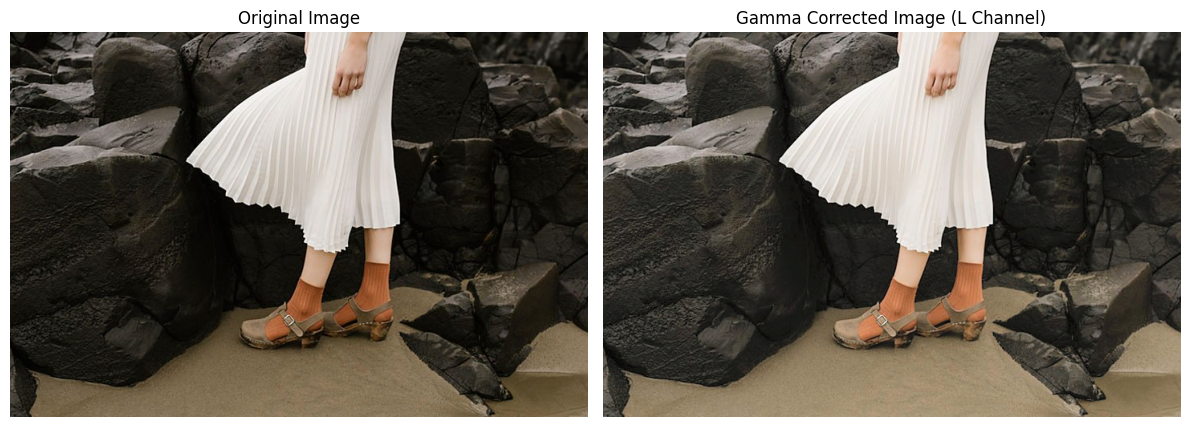

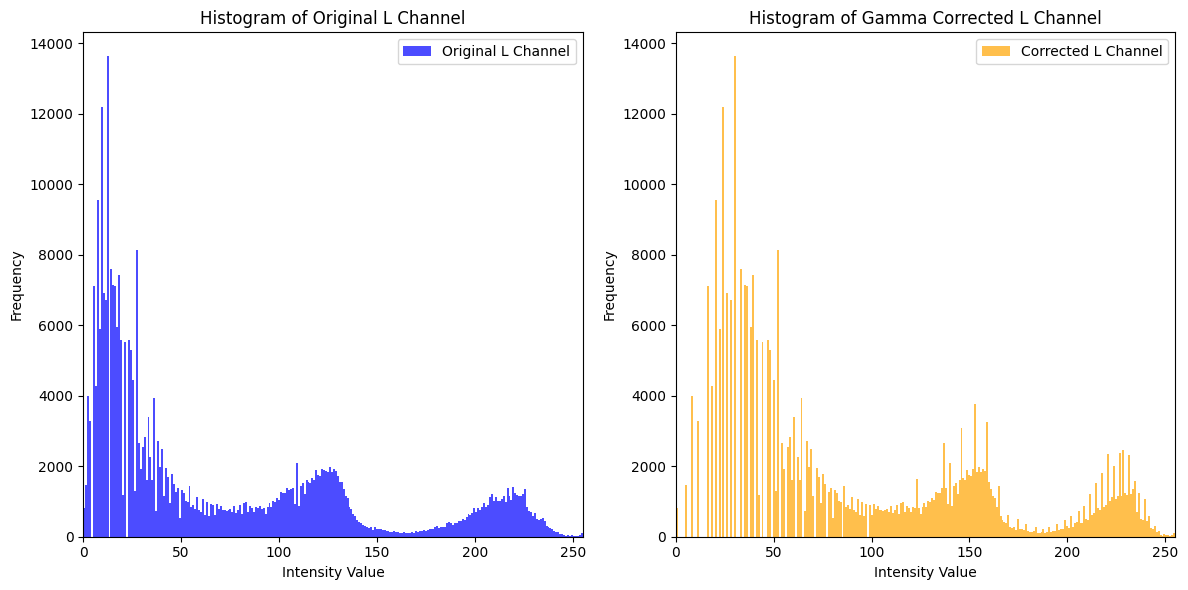

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\spram\Documents\IPNMV\images\highlights_and_shadows.jpg' 
original_image = cv.imread(image_path)

# Convert the image from RGB to Lab color space
lab_image = cv.cvtColor(original_image, cv.COLOR_BGR2Lab)

# Split the Lab image into its channels
L_channel, a_channel, b_channel = cv.split(lab_image)

# Set the gamma value for correction
gamma = 0.7  # Gamma

# Apply gamma correction to the L channel
L_corrected = np.clip((L_channel / 255.0) ** gamma * 255, 0, 255).astype(np.uint8)

# Merge the modified L channel back with the original a and b channels
corrected_lab_image = cv.merge((L_corrected, a_channel, b_channel))

# Convert the corrected Lab image back to RGB color space
corrected_image = cv.cvtColor(corrected_lab_image, cv.COLOR_Lab2BGR)

# Plot the original and corrected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
ax[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

# Display corrected image
ax[1].imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Gamma Corrected Image (L Channel)')

# Turn off axes for better visualization
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Plot histograms of the original and corrected L channels
plt.figure(figsize=(12, 6))

# Histogram for the original L channel
plt.subplot(1, 2, 1)
plt.hist(L_channel.ravel(), bins=256, color='blue', alpha=0.7, label='Original L Channel')
plt.title('Histogram of Original L Channel')
plt.xlim([0, 255])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()

# Histogram for the corrected L channel
plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), bins=256, color='orange', alpha=0.7, label='Corrected L Channel')
plt.title('Histogram of Gamma Corrected L Channel')
plt.xlim([0, 255])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Task 4

C:\Users\spram\AppData\Local\Temp\ipykernel_10264\1051301009.py:25: RuntimeWarning: overflow encountered in scalar subtract
  transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)
C:\Users\spram\AppData\Local\Temp\ipykernel_10264\1051301009.py:25: RuntimeWarning: overflow encountered in scalar negative
  transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)


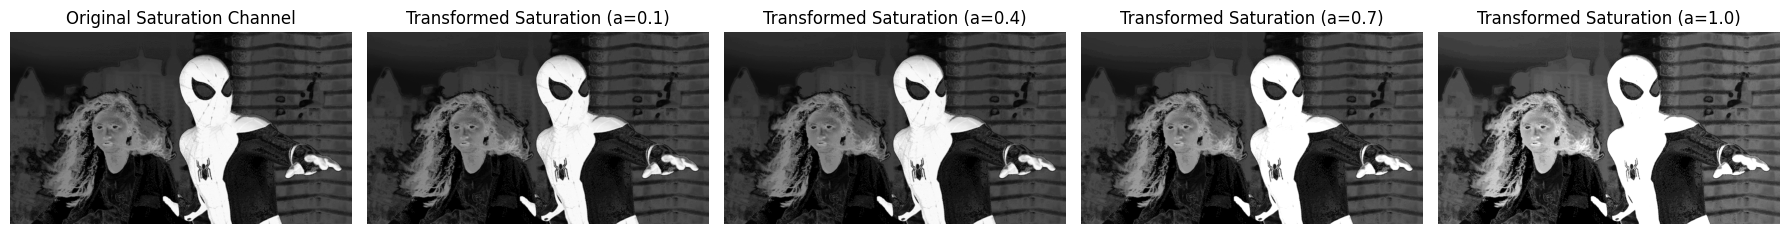

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\\spram\\Documents\\IPNMV\\images\\spider.png'
im = cv.imread(image_path)

# (a) Convert the image from BGR to HSV color space and split into channels
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_channel = im_hsv[:, :, 0]  # Hue channel
s_channel = im_hsv[:, :, 1]  # Saturation channel
v_channel = im_hsv[:, :, 2]  # Value channel

# (b) Define parameters for the intensity transformation
sigma = 70

# Create a function to apply the intensity transformation
def intensity_transformation(s_channel, a, sigma):
    transformed = np.zeros_like(s_channel, dtype=np.uint8)
    
    for i in range(s_channel.shape[0]):
        for j in range(s_channel.shape[1]):
            x = s_channel[i, j]  # Get the intensity value (input)
            transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

    transformed = np.clip(transformed, 0, 255).astype(np.uint8)
    return transformed

# (c) Define different values of 'a'
a_values = [0.1, 0.4, 0.7, 1.0]  # Different values of 'a'

# Create a figure to display results
plt.figure(figsize=(18, 8))

# Plot original saturation channel
plt.subplot(1, len(a_values) + 1, 1)
plt.imshow(s_channel, cmap='gray')
plt.title('Original Saturation Channel')
plt.axis('off')

# Apply intensity transformation for each value of 'a'
for idx, a in enumerate(a_values):
    s_channel_transformed = intensity_transformation(s_channel, a, sigma)

    # Display the transformed saturation channel
    plt.subplot(1, len(a_values) + 1, idx + 2)
    plt.imshow(s_channel_transformed, cmap='gray')
    plt.title(f'Transformed Saturation (a={a})')
    plt.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


Best value of a for visually pleasing output: 0.4

C:\Users\spram\AppData\Local\Temp\ipykernel_10264\873702712.py:25: RuntimeWarning: overflow encountered in scalar subtract
  transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)
C:\Users\spram\AppData\Local\Temp\ipykernel_10264\873702712.py:25: RuntimeWarning: overflow encountered in scalar negative
  transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)


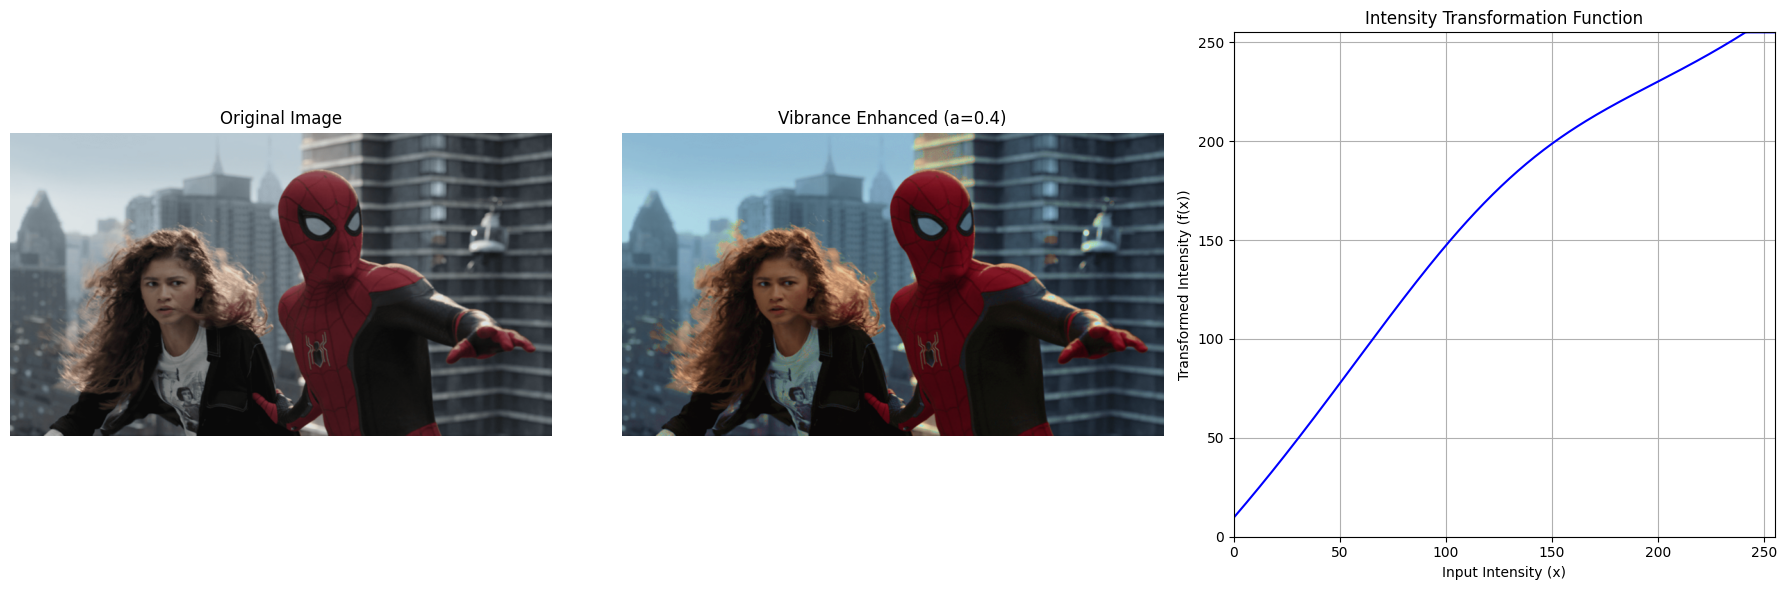

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\\spram\\Documents\\IPNMV\\images\\spider.png'
im = cv.imread(image_path)

# (a) Convert the image from BGR to HSV color space and split into channels
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_channel = im_hsv[:, :, 0]  # Hue channel
s_channel = im_hsv[:, :, 1]  # Saturation channel
v_channel = im_hsv[:, :, 2]  # Value channel

# (b) Define parameters for the intensity transformation
sigma = 70

# Create a function to apply the intensity transformation
def intensity_transformation(s_channel, a, sigma):
    transformed = np.zeros_like(s_channel, dtype=np.uint8)
    
    for i in range(s_channel.shape[0]):
        for j in range(s_channel.shape[1]):
            x = s_channel[i, j]  # Get the intensity value (input)
            transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

    transformed = np.clip(transformed, 0, 255).astype(np.uint8)
    return transformed

# (c) Define the chosen value of 'a'
best_a = 0.4

# Apply intensity transformation to the saturation channel with the chosen 'a'
s_channel_transformed = intensity_transformation(s_channel, best_a, sigma)

# (d) Recombine the channels
im_hsv_transformed = cv.merge((h_channel, s_channel_transformed, v_channel))

# Convert back to BGR color space for visualization
vibrance_enhanced_image = cv.cvtColor(im_hsv_transformed, cv.COLOR_HSV2BGR)

# Prepare to plot the intensity transformation function
x_values = np.arange(0, 256)
y_values = [min(x + best_a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255) for x in x_values]

# (e) Display the original image, vibrance-enhanced image, and the intensity transformation
plt.figure(figsize=(18, 6))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display vibrance-enhanced image
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(vibrance_enhanced_image, cv.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced (a={best_a})')
plt.axis('off')

# Display intensity transformation plot
plt.subplot(1, 3, 3)
plt.plot(x_values, y_values, color='blue')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Transformed Intensity (f(x))')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


Task 5

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\spram\AppData\Local\Temp\ipykernel_10264\3545748372.py:24: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'C:\\Users\spram\Documents\IPNMV\images\shells.tif'


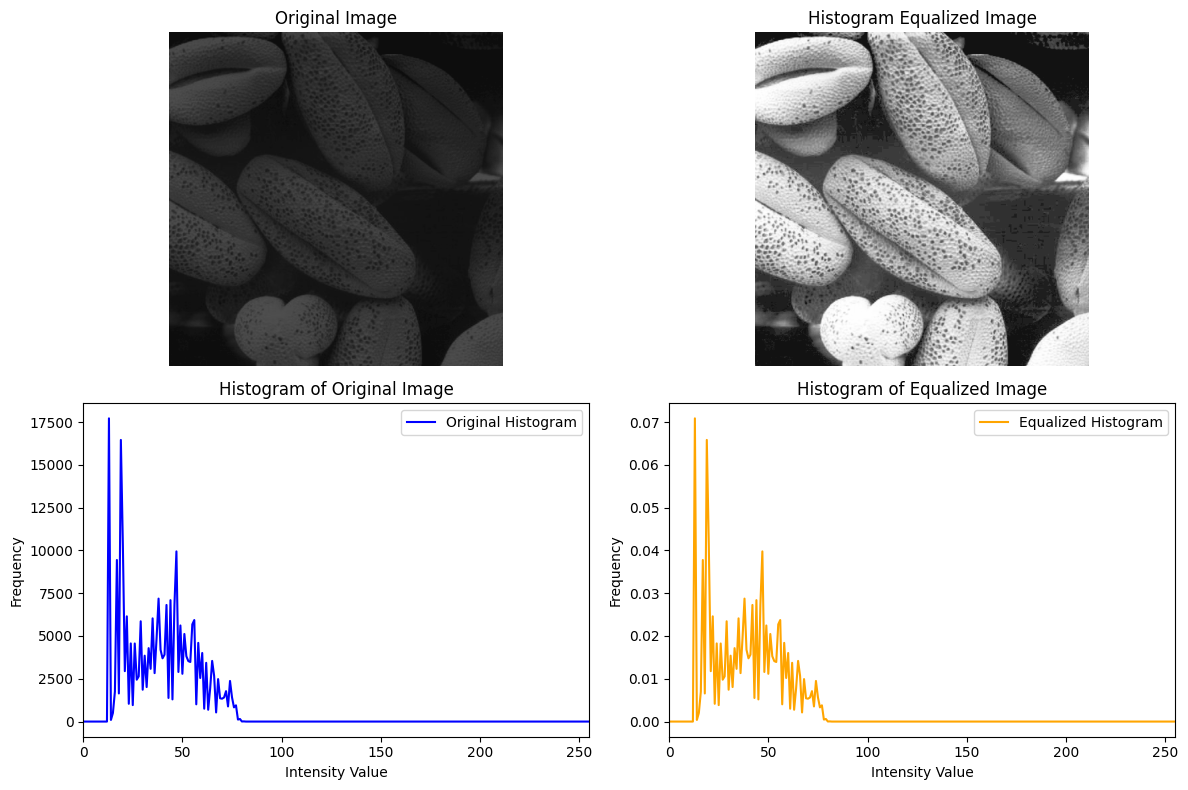

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Calculate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    
    # Create the transformation function based on the CDF
    t = np.array([cdf_normalized[i] for i in range(256)], dtype=np.uint8)
    
    # Apply the transformation to the image
    equalized_image = t[image]
    
    return equalized_image, hist, hist / hist.sum(), cdf_normalized

# Load the grayscale image
image_path = 'C:\\Users\spram\Documents\IPNMV\images\shells.tif'
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Perform histogram equalization
g, original_hist, equalized_hist, cdf_normalized = histogram_equalization(f)

# Plot the original and equalized images, and their histograms
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Equalized Image
ax[0, 1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Histogram Equalized Image')
ax[0, 1].axis('off')

# Histogram of Original Image
ax[1, 0].plot(original_hist, color='blue', label='Original Histogram')
ax[1, 0].set_title('Histogram of Original Image')
ax[1, 0].set_xlim([0, 255])
ax[1, 0].set_xlabel('Intensity Value')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].legend()

# Histogram of Equalized Image
ax[1, 1].plot(equalized_hist, color='orange', label='Equalized Histogram')
ax[1, 1].set_title('Histogram of Equalized Image')
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_xlabel('Intensity Value')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


Task 6

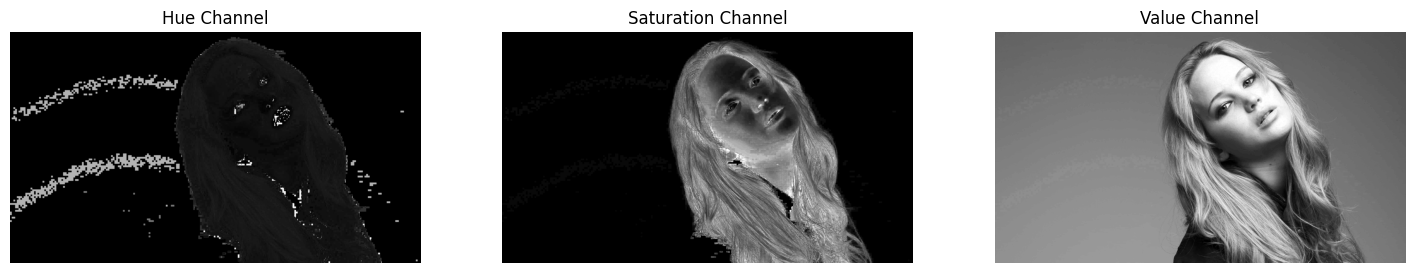

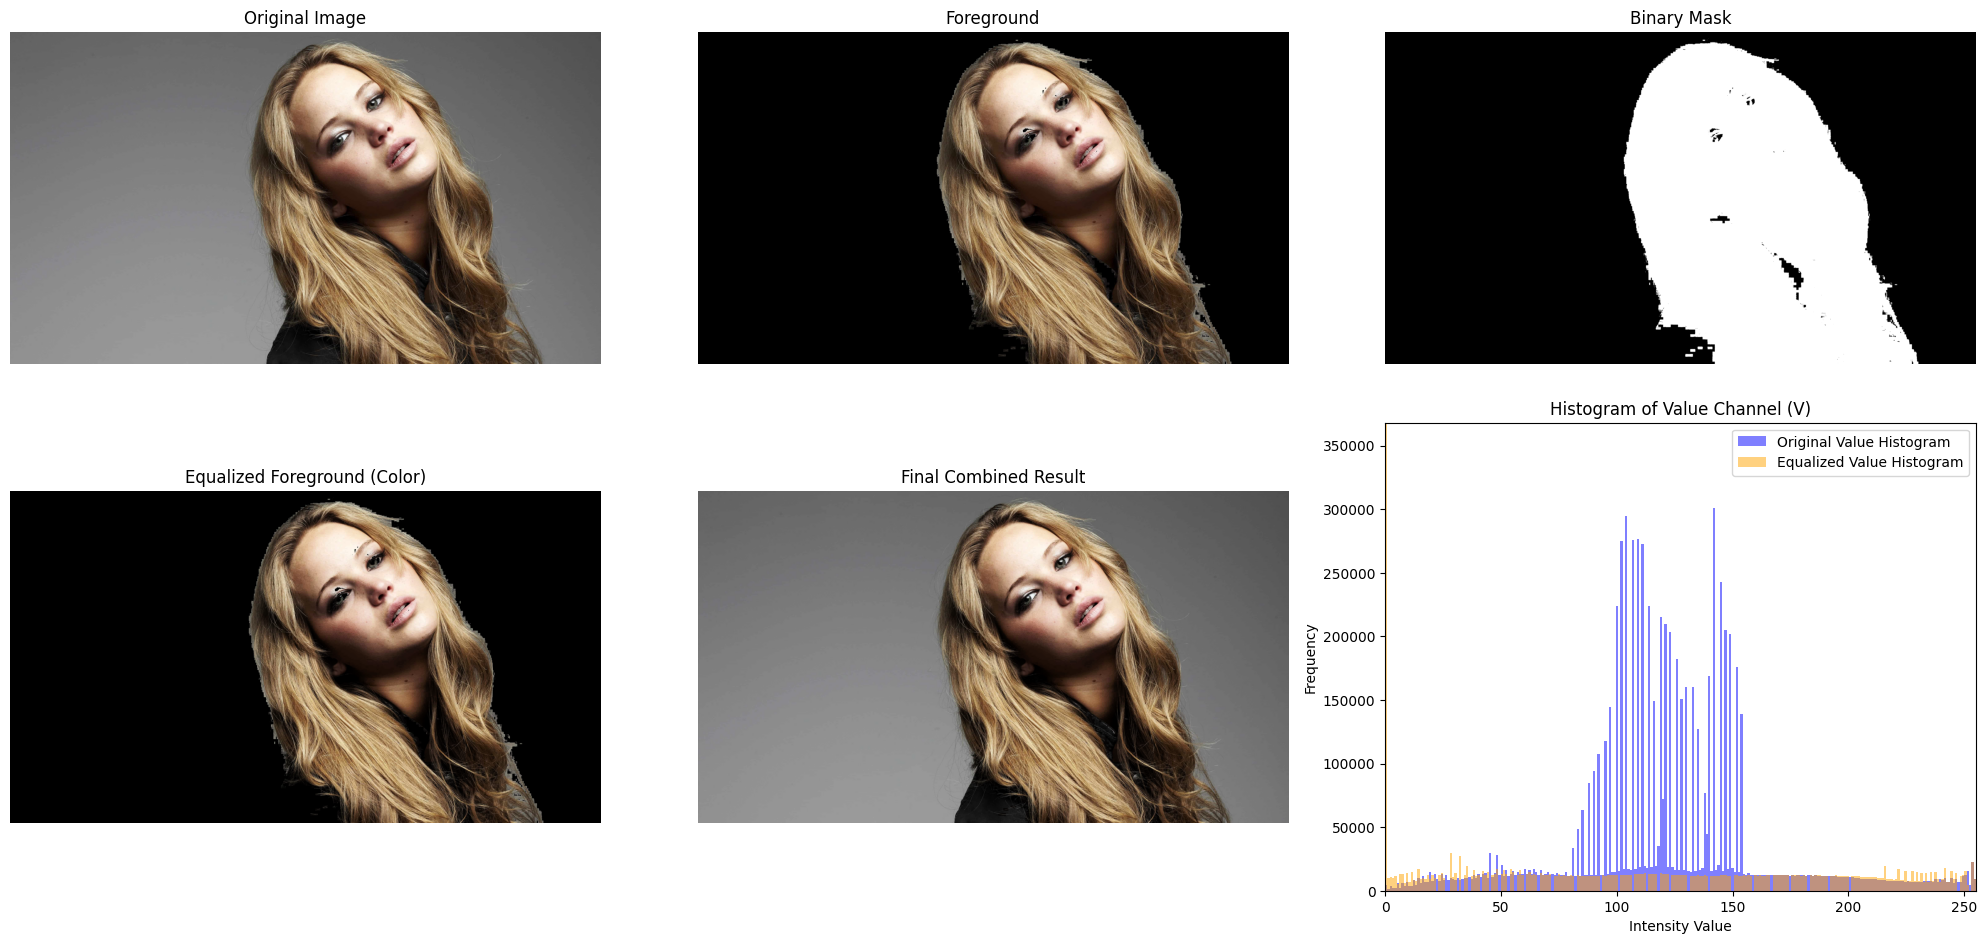

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\\spram\\Documents\\IPNMV\\images\\jeniffer.jpg'
image = cv.imread(image_path)

# Convert the image from BGR to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# (a) Split the image into hue, saturation, and value channels
h_channel, s_channel, v_channel = cv.split(hsv_image)

# Display the hue, saturation, and value channels in grayscale
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(h_channel, cmap='gray')
ax[0].set_title('Hue Channel')
ax[0].axis('off')

ax[1].imshow(s_channel, cmap='gray')
ax[1].set_title('Saturation Channel')
ax[1].axis('off')

ax[2].imshow(v_channel, cmap='gray')
ax[2].set_title('Value Channel')
ax[2].axis('off')

plt.show()

# (b) Create a binary mask from the saturation channel
threshold_value = 14  # threshold to extract the foreground
_, mask = cv.threshold(s_channel, threshold_value, 255, cv.THRESH_BINARY)

# (c) Obtain the foreground using the mask
foreground = cv.bitwise_and(image, image, mask=mask)

# Compute histogram of the value channel in the foreground
v_foreground = cv.bitwise_and(v_channel, v_channel, mask=mask)
hist, bins = np.histogram(v_foreground.flatten(), 256, [0, 256])

# (d) Obtain cumulative sum of the histogram
cdf = hist.cumsum()

# (e) Histogram equalization on the value channel (V)
cdf_min = cdf[cdf > 0].min()  # Minimum non-zero CDF value
cdf_normalized = (cdf - cdf_min) * 255 / (cdf.max() - cdf_min)
cdf_normalized = np.ma.filled(cdf_normalized, 0).astype('uint8')

v_equalized = cdf_normalized[v_channel]  # Apply the transformation to the V channel

# Replace the value channel with the equalized version for the foreground
v_equalized_foreground = cv.bitwise_and(v_equalized, v_equalized, mask=mask)

# (f) Recombine the equalized V channel with original H and S channels
equalized_hsv = cv.merge([h_channel, s_channel, v_equalized_foreground])

# Convert the equalized image back to BGR color space
equalized_bgr = cv.cvtColor(equalized_hsv, cv.COLOR_HSV2BGR)

# Extract the background and combine it with the histogram-equalized foreground
background = cv.bitwise_and(image, image, mask=cv.bitwise_not(mask))
final_image = cv.add(background, equalized_bgr)

# Display results
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Original Image
ax[0, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Foreground
ax[0, 1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[0, 1].set_title('Foreground')
ax[0, 1].axis('off')

# Mask
ax[0, 2].imshow(mask, cmap='gray')
ax[0, 2].set_title('Binary Mask')
ax[0, 2].axis('off')

# Equalized Foreground
ax[1, 0].imshow(cv.cvtColor(equalized_bgr, cv.COLOR_BGR2RGB))
ax[1, 0].set_title('Equalized Foreground (Color)')
ax[1, 0].axis('off')

# Combined Result
ax[1, 1].imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
ax[1, 1].set_title('Final Combined Result')
ax[1, 1].axis('off')

# Histogram of the Value Channel (before and after)
ax[1, 2].hist(v_channel.flatten(), bins=256, color='blue', alpha=0.5, label='Original Value Histogram')
ax[1, 2].hist(v_equalized_foreground.flatten(), bins=256, color='orange', alpha=0.5, label='Equalized Value Histogram')
ax[1, 2].set_title('Histogram of Value Channel (V)')
ax[1, 2].set_xlim([0, 255])
ax[1, 2].set_ylim([0, 368000])
ax[1, 2].set_xlabel('Intensity Value')
ax[1, 2].set_ylabel('Frequency')
ax[1, 2].legend()

plt.tight_layout()
plt.show()


Task 7

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\spram\AppData\Local\Temp\ipykernel_10264\2943798494.py:6: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'C:\\Users\spram\Documents\IPNMV\images\einstein.png'


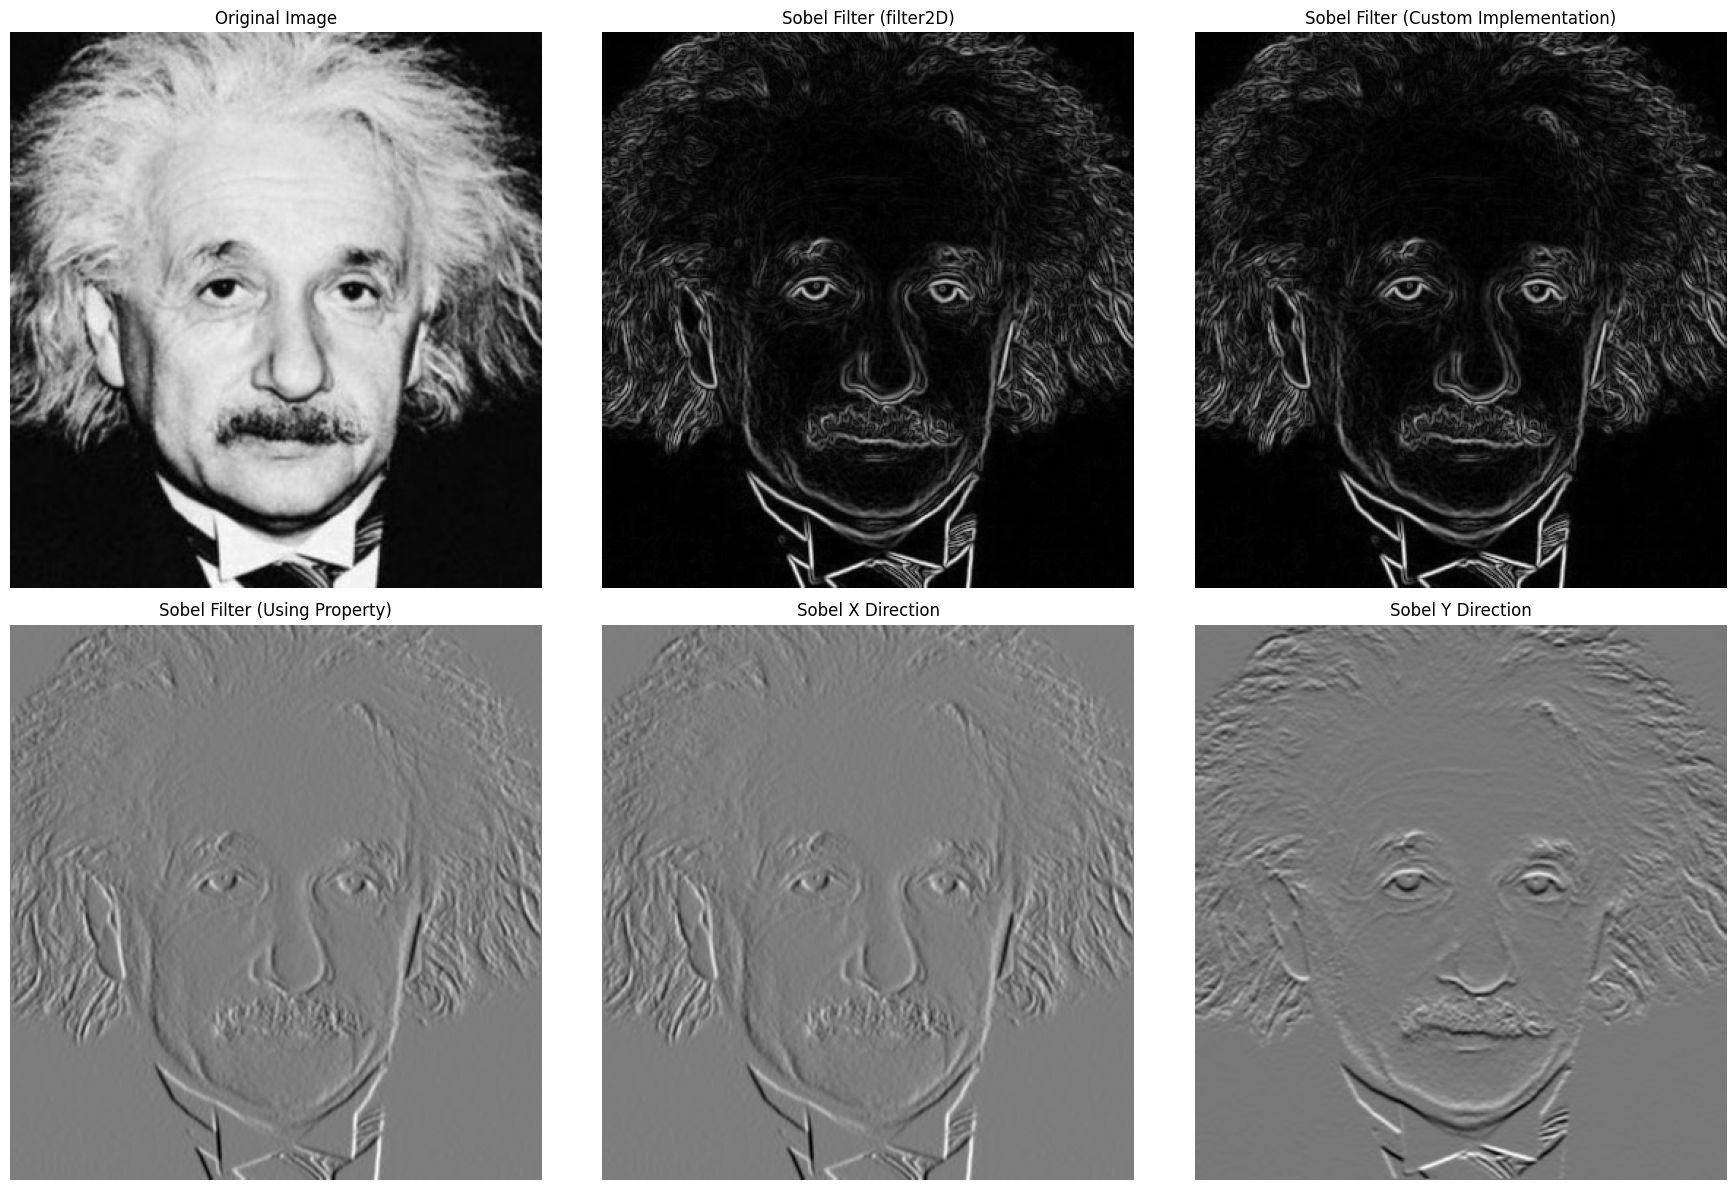

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\spram\Documents\IPNMV\images\einstein.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# (a) Using filter2D to Sobel filter the image
# Define Sobel kernels
sobel_x_kernel = np.array([[1, 0, -1],
                            [2, 0, -2],
                            [1, 0, -1]], dtype=np.float32)

sobel_y_kernel = np.array([[1, 2, 1],
                            [0, 0, 0],
                            [-1, -2, -1]], dtype=np.float32)

# Apply Sobel filter using filter2D
sobel_x_filter2D = cv.filter2D(image, cv.CV_64F, sobel_x_kernel)
sobel_y_filter2D = cv.filter2D(image, cv.CV_64F, sobel_y_kernel)
sobel_combined_filter2D = cv.magnitude(sobel_x_filter2D, sobel_y_filter2D)

# (b) Custom implementation of the Sobel filter
def custom_sobel_filter(image):
    gradient_x = cv.filter2D(image, cv.CV_64F, sobel_x_kernel)
    gradient_y = cv.filter2D(image, cv.CV_64F, sobel_y_kernel)
    return cv.magnitude(gradient_x, gradient_y)

# Apply custom Sobel filter
sobel_custom = custom_sobel_filter(image)

# (c) Using the property to carry out Sobel filtering
# The property states that the Sobel X kernel can be constructed from the outer product of two vectors
vertical_vector = np.array([[1], [2], [1]], dtype=np.float32)  # 3x1 vector
horizontal_vector = np.array([[1, 0, -1]], dtype=np.float32)  # 1x3 vector

# Create the Sobel kernel using outer product
sobel_kernel = vertical_vector @ horizontal_vector  # 3x3 kernel
sobel_property = cv.filter2D(image, cv.CV_64F, sobel_kernel)

# Display results
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Original Image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Sobel using filter2D
ax[0, 1].imshow(sobel_combined_filter2D, cmap='gray')
ax[0, 1].set_title('Sobel Filter (filter2D)')
ax[0, 1].axis('off')

# Custom Sobel Filter
ax[0, 2].imshow(sobel_custom, cmap='gray')
ax[0, 2].set_title('Sobel Filter (Custom Implementation)')
ax[0, 2].axis('off')

# Sobel using property
ax[1, 0].imshow(sobel_property, cmap='gray')
ax[1, 0].set_title('Sobel Filter (Using Property)')
ax[1, 0].axis('off')

# Sobel X
ax[1, 1].imshow(sobel_x_filter2D, cmap='gray')
ax[1, 1].set_title('Sobel X Direction')
ax[1, 1].axis('off')

# Sobel Y
ax[1, 2].imshow(sobel_y_filter2D, cmap='gray')
ax[1, 2].set_title('Sobel Y Direction')
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()


Task 8

<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
C:\Users\spram\AppData\Local\Temp\ipykernel_10264\2005270862.py:33: SyntaxWarning: invalid escape sequence '\D'
  ('C:\\Users\\spram\\Documents\\IPNMV\\images\\a1q8images\\im01.png', 'C:\\Users\\spram\Documents\\IPNMV\\images\\a1q8images\\im01small.png'),


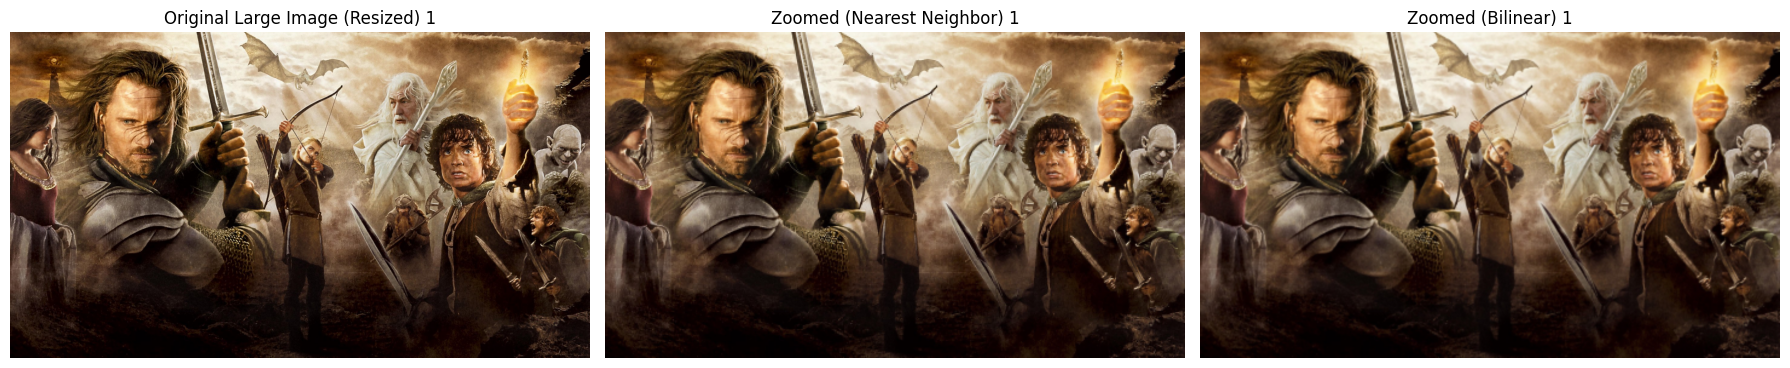

Image Pair 1
  Normalized SSD (Nearest Neighbor): 408.81
  Normalized SSD (Bilinear): 345.28


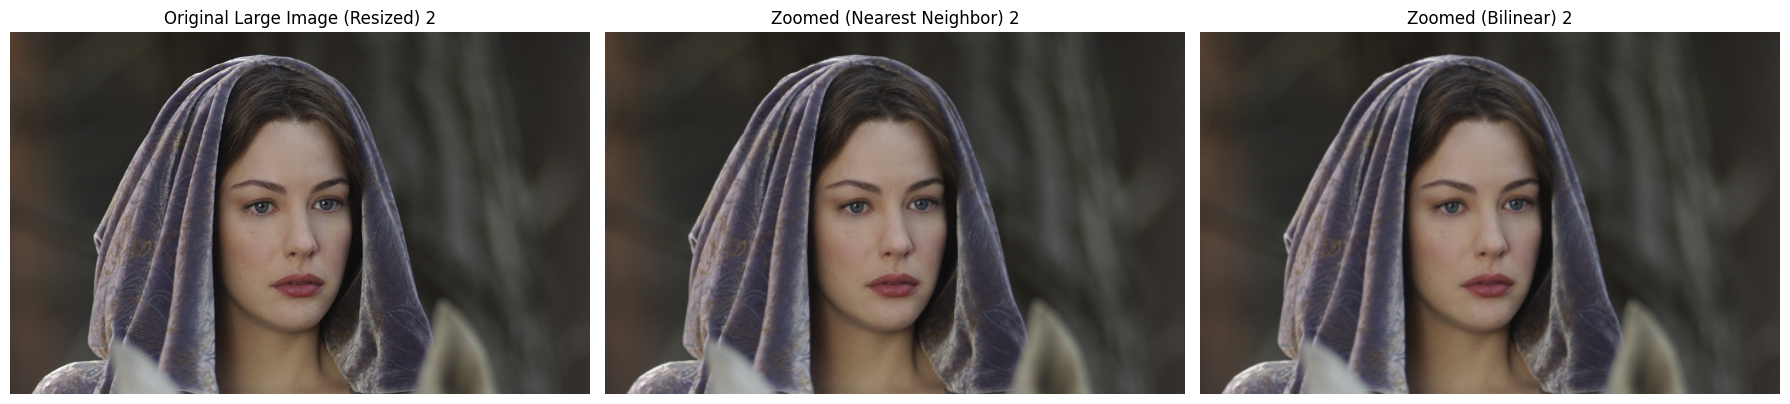

Image Pair 2
  Normalized SSD (Nearest Neighbor): 79.34
  Normalized SSD (Bilinear): 55.04


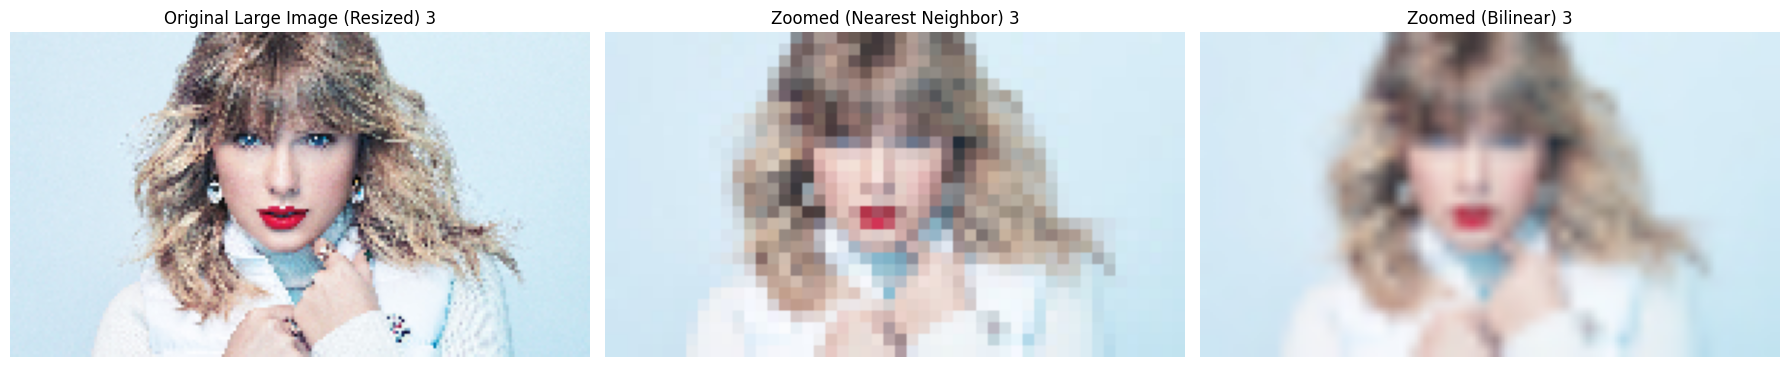

Image Pair 3
  Normalized SSD (Nearest Neighbor): 1434.67
  Normalized SSD (Bilinear): 1356.95


In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to zoom an image using nearest-neighbor or bilinear interpolation
def zoom_image(image, scale, interpolation='nearest'):
    # Calculate new dimensions
    new_height = int(image.shape[0] * scale)
    new_width = int(image.shape[1] * scale)
    
    # Select interpolation method
    if interpolation == 'nearest':
        zoomed_image = cv.resize(image, (new_width, new_height), interpolation=cv.INTER_NEAREST)
    elif interpolation == 'bilinear':
        zoomed_image = cv.resize(image, (new_width, new_height), interpolation=cv.INTER_LINEAR)
    else:
        raise ValueError("Interpolation method not recognized. Use 'nearest' or 'bilinear'.")
    
    return zoomed_image

# Function to compute the sum of squared differences (SSD)
def compute_ssd(image1, image2):
    # Compute normalized sum of squared differences
    ssd = np.sum((image1.astype(np.float32) - image2.astype(np.float32)) ** 2)
    return ssd / (image1.shape[0] * image1.shape[1])

# Function to resize an image to match a target shape
def resize_image(image, target_shape):
    return cv.resize(image, (target_shape[1], target_shape[0]))

# Image pair paths
image_pairs = [
    ('C:\\Users\\spram\\Documents\\IPNMV\\images\\a1q8images\\im01.png', 'C:\\Users\\spram\Documents\\IPNMV\\images\\a1q8images\\im01small.png'),
    ('C:\\Users\\spram\\Documents\\IPNMV\\images\\a1q8images\\im02.png', 'C:\\Users\\spram\\Documents\\IPNMV\\images\\a1q8images\\im02small.png'),
    ('C:\\Users\\spram\\Documents\\IPNMV\\images\\a1q8images\\taylor.jpg', 'C:\\Users\\spram\\Documents\\IPNMV\\images\\a1q8images\\taylor_very_small.jpg')
]

# Zoom factor
scale_factor = 4.0

# Loop through each image pair
for idx, (large_image_path, small_image_path) in enumerate(image_pairs):
    # Load the images
    original_large_image = cv.imread(large_image_path) 
    original_small_image = cv.imread(small_image_path)

    # (a) Zoom using nearest-neighbor interpolation
    zoomed_nearest = zoom_image(original_small_image, scale_factor, interpolation='nearest')

    # (b) Zoom using bilinear interpolation
    zoomed_bilinear = zoom_image(original_small_image, scale_factor, interpolation='bilinear')

    # Resize the original large image to match the zoomed images' size
    resized_large_image = resize_image(original_large_image, zoomed_nearest.shape[:2])

    # Compute SSD between zoomed images and the resized original large image
    ssd_nearest = compute_ssd(zoomed_nearest, resized_large_image)
    ssd_bilinear = compute_ssd(zoomed_bilinear, resized_large_image)

    # Display the results for each image pair
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Resized Original Large Image
    ax[0].imshow(cv.cvtColor(resized_large_image, cv.COLOR_BGR2RGB))
    ax[0].set_title(f'Original Large Image (Resized) {idx+1}')
    ax[0].axis('off')

    # Zoomed Image (Nearest Neighbor)
    ax[1].imshow(cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB))
    ax[1].set_title(f'Zoomed (Nearest Neighbor) {idx+1}')
    ax[1].axis('off')

    # Zoomed Image (Bilinear)
    ax[2].imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
    ax[2].set_title(f'Zoomed (Bilinear) {idx+1}')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Print SSD values for each image pair
    print(f"Image Pair {idx+1}")
    print(f"  Normalized SSD (Nearest Neighbor): {ssd_nearest:.2f}")
    print(f"  Normalized SSD (Bilinear): {ssd_bilinear:.2f}")


Task 9

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the flower image
image_path = 'C:\\Users\spram\Documents\IPNMV\images\daisy.jpg'
image = cv.imread(image_path)

# Step 1: Initialize the mask and background/foreground models
mask = np.zeros(image.shape[:2], np.uint8)  # Initial mask
bgd_model = np.zeros((1, 65), np.float64)  # Background model
fgd_model = np.zeros((1, 65), np.float64)  # Foreground model

# Define a rectangle that roughly contains the foreground
rect = (10, 10, image.shape[1] - 10, image.shape[0] - 10)  # Adjust as needed

# Apply GrabCut algorithm
cv.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)

# Modify mask to create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')  # 0: background, 1: foreground
segmented_image = image * mask2[:, :, np.newaxis]  # Apply mask to get the segmented image

# Step 2: Display segmentation results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Original Image
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Segmented Foreground Image
ax[1].imshow(cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Segmented Foreground')
ax[1].axis('off')

# Background Image
background_image = image * (1 - mask2[:, :, np.newaxis])  # Extract background
ax[2].imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
ax[2].set_title('Background Image')
ax[2].axis('off')

plt.show()

# Step 3: Produce an enhanced image with a blurred background
# Blur the original image for the background
blurred_background = cv.GaussianBlur(image, (41, 41), 0)

# Combine the blurred background with the segmented foreground
enhanced_image = blurred_background * (1 - mask2[:, :, np.newaxis]) + segmented_image

# Display the original and enhanced images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Enhanced Image
ax[1].imshow(cv.cvtColor(enhanced_image.astype(np.uint8), cv.COLOR_BGR2RGB))
ax[1].set_title('Enhanced Image with Blurred Background')
ax[1].axis('off')

plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\spram\AppData\Local\Temp\ipykernel_10264\1761908648.py:6: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'C:\\Users\spram\Documents\IPNMV\images\daisy.jpg'


The background just beyond the edge of the flower appears quite dark in the enhanced image because the blurred background can create a soft transition between the edges of the flower and the surrounding area. This can lead to a lower perceived brightness at the edges where the flower's colors blend with the blurred background.